In [677]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [678]:
#Open Sample_data file and read each line based on new line
file_object=open("C:\\Users\\skandhaswa001\\Desktop\\Python\\Sample_Data.csv", encoding = 'utf8')
data=file_object.read()
rows=data.split('\n')

In [679]:
#Count delimiter count from the header of the file
delimiter_count=len(rows[0].split(','))

In [480]:
bad_data={}
good_data=[]
good_data_list=[]
for idx,line_data in enumerate(rows) : 
    bad_data[idx]={}
    #Blank space row moving into bad_data
    if line_data=='': 
        bad_data[idx]["Blank Row"]=line_data
    #Special Characters row moving into bad_data
    elif re.search(r'[@#!\$ひらが]',line_data) :        
        bad_data[idx]["Special Characters"]=line_data
    elif len(line_data.replace(',',''))==0 :
        bad_data[idx]["Empty String"]=line_data
    #Inconsistent delimiter row moving into bad_data
    elif  len(line_data.split(','))!= delimiter_count :
        bad_data[idx]["Inconsistent Delimiter"]=line_data
    else :
        con=str(idx)+","+line_data
        good_data.append(con)
    
bad_data={key: value for (key,value) in  bad_data.items() if value} 
good_data_list=[row.split(",") for row in good_data]



In [682]:
#Removing duplicate, striping space and exporting the data to csv
df_all=pd.DataFrame(good_data_list,columns=good_data_list[0])[1:]
df_all = df_all.rename(columns={'0': 'RowNum'})
df=df_all.drop_duplicates(["CustomerID"],keep='first')
df[df.columns]=df.apply(lambda x: x.str.strip())
#remove index and row num column
df.iloc[0:,1:].to_csv("C:\\Users\\skandhaswa001\\Desktop\\Python\\Processed.csv",index=False)


C:\Users\skandhaswa001\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\frame.py:2450: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [515]:
#Handling Duplicate records into bad file
customer_id=df_all["CustomerID"]
#Getting only the duplicate record based on Customer id if repeted  -->1
dup_rows=df_all[customer_id.isin (customer_id[customer_id.duplicated()])]
#Unique customer id , which are dup -->2
dup_rows_unique=dup_rows.drop_duplicates(["CustomerID"],keep='first')
#Removing 2 from 1
dup_rows=dup_rows.drop(dup_rows_unique.index)
dup_rows=dup_rows.set_index("RowNum")
#converting series to list
dup_inx=dup_rows.index
#looping through the list to get dup record from file and placing into bad data dictionary
for each in dup_inx:
    each=int(each)
    bad_data[each]={}
    bad_data[each]["Duplicate"]=rows[each]
    
newdict_bad = {(k1, k2):v2 for k1,v1 in bad_data.items() for k2,v2 in bad_data[k1].items()}   


In [518]:
bad_df = pd.DataFrame([newdict_bad[i] for i in sorted(newdict_bad)],
                  index=pd.MultiIndex.from_tuples([i for i in sorted(newdict_bad.keys())]))
#bad_df.columns=['Rownum','ErrorType' 'Data']
bad_df=bad_df.reset_index()
bad_df=bad_df.rename(columns={'level_0':'Rownum','level_1':'ErrorType',0:'Data'})
bad_df.to_csv("C:\\Users\\skandhaswa001\\Desktop\\Python\\Bad_Records.csv",index=False)

In [519]:
#Loading cleaned data into Sqlite db
import sqlite3
conn=sqlite3.connect("C:\\Users\\skandhaswa001\\Desktop\\Python\\Cleanup.db")
final_df.to_sql("Customer1",conn,index=False)
cur=conn.cursor()
cur.execute("select * from Customer;").fetchall()

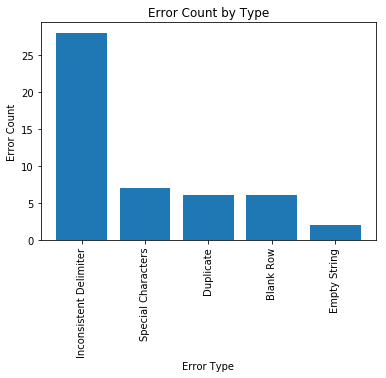

In [612]:
#Plot graph - Error type and its count

Error_count=bad_df["ErrorType"].value_counts()
Index=Error_count.index.tolist()
value=Error_count.tolist()
bar_positions = np.arange(len(Index)) + 0.75
plt.bar(bar_positions,value,label='Error Count')
plt.xlabel('Error Type')
plt.ylabel('Error Count')
plt.xticks(bar_positions,Index,rotation=90)
plt.title('Error Count by Type')



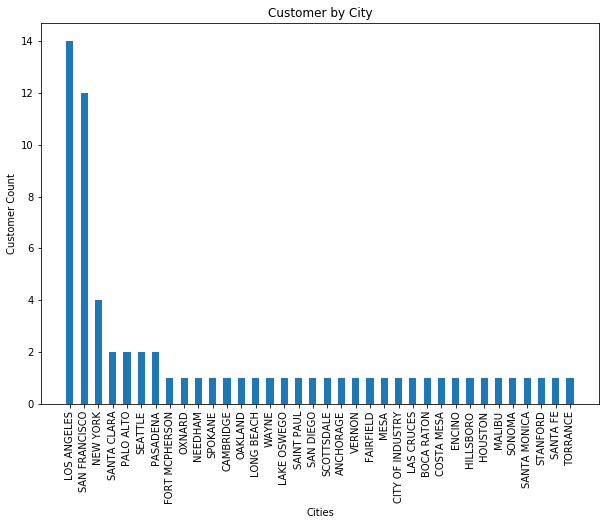

In [656]:
#Cities by Customer
Index=City.index.tolist()
value=City.tolist()
bar_positions = np.arange(len(Index)) + 0.75
plt.figure(figsize=(10, 7))
plt.bar(bar_positions,value,width=0.5)
plt.xlabel('Cities')
plt.ylabel('Customer Count')
plt.xticks(bar_positions,Index,rotation=90)
plt.title('Customer by City')

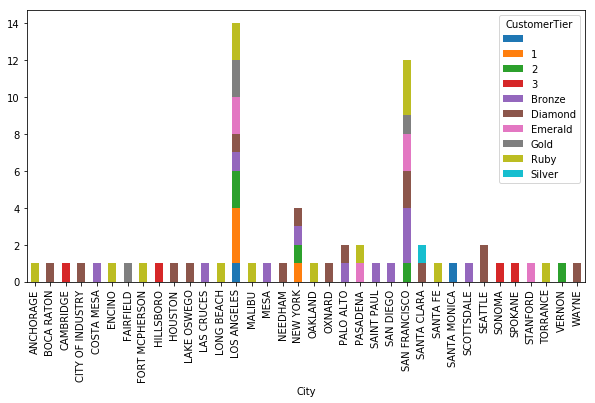

In [676]:
#Cities with more customer
final_df
#Count customer count based on city and CustomerTier
final_df.groupby(['City', 'CustomerTier'])['CustomerID'].size()
#Unstack 
final_df.groupby(['City', 'CustomerTier'])['CustomerID'].size().unstack()
#Plot graph
final_df.groupby(['City', 'CustomerTier'])['CustomerID'].size().unstack().plot(kind='bar', stacked=True,figsize=(10,5))

